In [101]:
# imports and load data
import pandas as pd
df = pd.read_csv('store_data.csv')
un_df = pd.read_csv('store_data.csv')
%matplotlib inline

## Activities

**Which store has the highest total sales for the last month?**

**Which store makes the most sales on average?**

**Which store sells the most during the week of March 13th, 2016?**

**Which store has the most sales in the latest 3-month period?**

## Explore data


In [102]:
print(df.head())

         week  storeA  storeB  storeC  storeD  storeE
0  2014-05-04    2643    8257    3893    6231    1294
1  2014-05-11    6444    5736    5634    7092    2907
2  2014-05-18    9646    2552    4253    5447    4736
3  2014-05-25    5960   10740    8264    6063     949
4  2014-06-01    7412    7374    3208    3985    3023


In [103]:
print(df.dtypes,'\n')
print(df.info())

week      object
storeA     int64
storeB     int64
storeC     int64
storeD     int64
storeE     int64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null object
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB
None


In [104]:
#check for null values
print(df.columns.isnull().any())

False


In [105]:
# parsse week column to dates
df['week'] = pd.to_datetime(df['week'])
df.head().dtypes

week      datetime64[ns]
storeA             int64
storeB             int64
storeC             int64
storeD             int64
storeE             int64
dtype: object

## Sales for the last month

### **Which store has the highest total sales for the last month?**


In [106]:
df['week'].tail()

195   2018-01-28
196   2018-02-04
197   2018-02-11
198   2018-02-18
199   2018-02-25
Name: week, dtype: datetime64[ns]

In [107]:
sales_lastmonth=df[df['week']>='2018-02-01']
sales_lastmonth

,week,storeA,storeB,storeC,storeD,storeE
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [142]:
# plot data for last month sales
sumSales_lastMonth= sales_lastmonth.sum()
sumSales_lastMonth

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
dtype: int64

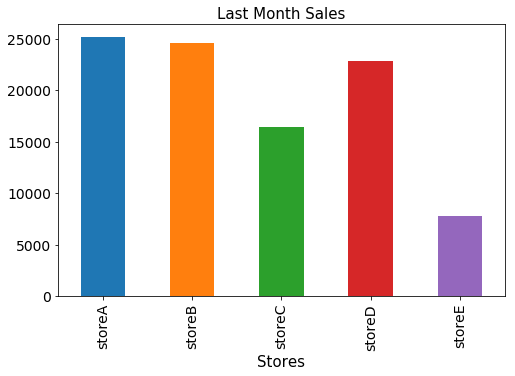

In [152]:
lastMonth_salesGraph=sumSales_lastMonth.plot(kind='bar', figsize=(8,5), fontsize=14);
lastMonth_salesGraph.set_title('Last Month Sales', fontsize=(15));
lastMonth_salesGraph.set_xlabel('Stores', fontsize=(15));

In [176]:
# store with highest total sales last month
sumSales_lastMonth_dic=dict(sumSales_lastMonth)
max_sales= max(sumSales_lastMonth_dic.values())
max_sales_store = list(sumSales_lastMonth_dic.keys())[list(sumSales_lastMonth_dic.values()).index(max_sales)]

sales_statement = f'Store with highest sales last month is {max_sales_store} @ {max_sales}'
print(sales_statement)

Store with highest sales last month is storeA @ 25127


## Average sales

### **Which store makes the most sales on average?**



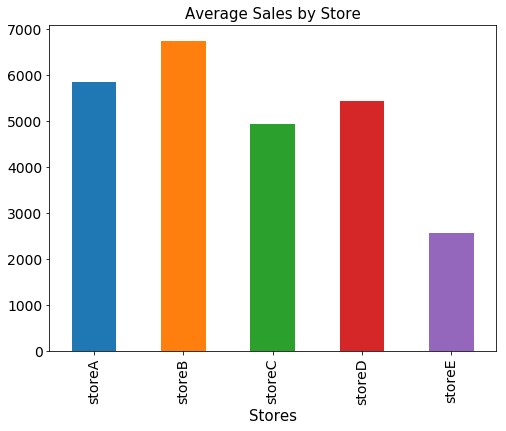

In [203]:
# get stores average sales
avg_sales = df.mean()
avg_sales_graph=avg_sales.plot.bar(fontsize=(14), figsize=(8,6));
avg_sales_graph.set_title('Average Sales by Store', fontsize=(15));
avg_sales_graph.set_xlabel('Stores', fontsize=(15));

In [223]:
# store with highest avg sales
avg_sales_dict=dict(avg_sales)
max_avg_sales = max(avg_sales_dict.values())
max_avg_store=list(avg_sales_dict.keys())[list(avg_sales_dict.values()).index(max_avg_sales)]

sales_statement_2 = f'Store with the most sales on avg is {max_avg_store} @ {max_avg_sales} '

print(sales_statement_2)

Store with the most sales on avg is storeB @ 6756.71 


## Sales for the week of March 13th, 2016

### **Which store sells the most during the week of March 13th, 2016?**



In [250]:
# fileter sales data to March 13th, 2016
mar_13_06_sales = df[df['week']=='2016-03-13'].drop('week', axis=1).reset_index(drop=True)
mar_13_06_sales

,storeA,storeB,storeC,storeD,storeE
0,2054,1390,5112,5513,2536


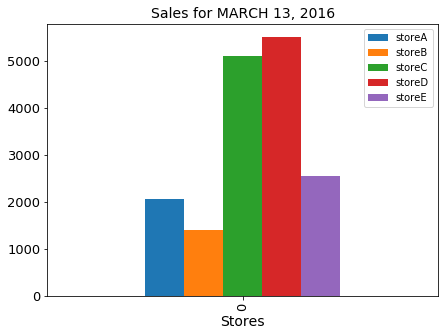

In [268]:
# plot sales for March 13th, 2016
mar_13_06_sales_graph = mar_13_06_sales.plot(kind='bar', figsize=(7,5), fontsize=13);
mar_13_06_sales_graph.set_title('Sales for MARCH 13, 2016', fontsize=14);
mar_13_06_sales_graph.set_xlabel('Stores', fontsize=14);

In [291]:
mar_13_06_sales_dict=dict(mar_13_06_sales.max())
mar_13_06_sales_max=max(mar_13_06_sales_dict.values())
mar_13_06_sales_maxStore = list(mar_13_06_sales_dict.keys())[list(mar_13_06_sales_dict.values()).index(mar_13_06_sales_max)]

sales_statement_3 = f'Store with highest store on March 13th, 2016 is {mar_13_06_sales_maxStore} @ {max_avg_sales}'

print(sales_statement_3)

Store with highest store on March 13th, 2016 is storeD @ 6756.71


## Sales for the latest 3-month periods

### **Which store has the most sales in the latest 3-month period?**


In [292]:
df['week'].tail()

195   2018-01-28
196   2018-02-04
197   2018-02-11
198   2018-02-18
199   2018-02-25
Name: week, dtype: datetime64[ns]

In [293]:
last_3months_sales = df[df['week']>='2017-12-01']

In [294]:
last_3months_sales

,week,storeA,storeB,storeC,storeD,storeE
187,2017-12-03,5179,3850,6121,6778,113
188,2017-12-10,9348,5624,5446,5448,227
189,2017-12-17,5310,8647,5680,7049,3578
190,2017-12-24,8976,9503,6240,3882,2890
191,2017-12-31,11875,1527,6711,5265,1701
192,2018-01-07,8978,11312,4158,5019,3842
193,2018-01-14,6963,4014,4215,7153,3097
194,2018-01-21,5553,3971,3761,6255,3071
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458


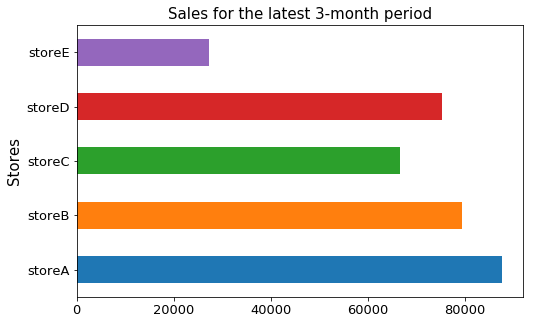

In [308]:
sum_last_3months_sales = last_3months_sales.sum()

last_3months_sales_graph = sum_last_3months_sales.plot(kind='barh', figsize=(8,5), fontsize=13);
last_3months_sales_graph.set_title('Sales for the latest 3-month period', fontsize=15);
last_3months_sales_graph.set_ylabel('Stores', fontsize=15);